In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
sns.set()
plt.rcParams["figure.figsize"] = (10, 6) 

In [50]:
df = pd.read_csv("heart.csv")

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


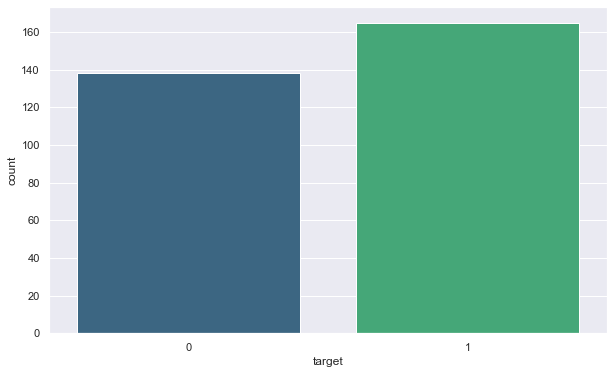

In [54]:
sns.countplot(data=df, x="target", palette='viridis')

In [55]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients tested positive for heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients tested negative for heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients tested positive for heart disease: 45.54%
Percentage of Patients tested negative for heart disease: 54.46%


In [56]:
thal = pd.get_dummies(df['thal'], drop_first=True, prefix='thal')
cp = pd.get_dummies(df['cp'], drop_first=True, prefix='cp')
slope = pd.get_dummies(df['slope'], drop_first=True, prefix='slope')

In [57]:
df = pd.concat([df, thal, cp, slope], axis=1)

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,1,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,0,1,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,0,1,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,1,0,0,0,0,0,1


In [59]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,1,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,1,0,0,0,0,0,1


In [60]:
X = df.drop(['target'], axis=1)
y = df.target

In [61]:
scaler = StandardScaler()

In [62]:
X = scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
classifier = LogisticRegression(random_state=0)

In [65]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = classifier.predict(X_test)

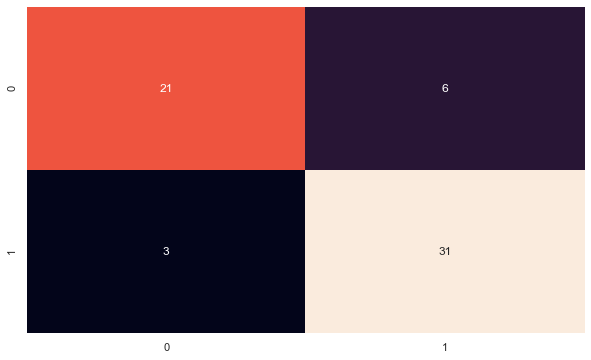

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [79]:
classifier.score(X_test,y_test)

0.8524590163934426

### Manual Implementation of Logistic Regression

In [80]:
def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [81]:
def sigmoid(z):
    y_hat = 1/(1+ np.exp(-z))
    return y_hat

In [ ]:
def costFunction(theta, X_train, y_train):
    

In [ ]:
def logistic_regression():
    learningRate = 1
    numberOfIterations = 100
    weight, bias = np.full((dimension, 1), 0.01)
    
    costList = []
    index = []
    
    for i in range(numberOfIterations):
        
    
    

242